# GR5074 HW2
Group member: \
Min Zhuang - mz3067@columbia.edu \
Jie Yuan - jy3339@columbia.edu \
Justin Yu - hy2855@columbia.edu \
Buirui Chen - bc3149@columbia.edu \

Github repo url: https://github.com/michellezzmmmmm/QMSS5074/tree/main


## 1. Use Google Drive link to view a folder I shared with @columbia.edu google drive users
https://drive.google.com/drive/folders/18O-BnGOIw9ZiUwy17Uk_361xyfTF-qAN?usp=sharing
## 2. Right click folder and click "Add shortcut to Drive"
This will make sure the zipfile in this folder is accessible in your personal drive folder


In [ ]:
from IPython.display import Image
from IPython.core.display import HTML

In [ ]:
# Step 2.1
Image(url= "https://github.com/user-attachments/assets/6515aa71-484b-4364-ac44-2331477720e8", width=600, height=300)

In [ ]:
# Step 2.2
Image(url= "https://github.com/user-attachments/assets/0d0d8f6c-a868-49c4-9e38-54f3006af39b", width=600, height=300)

## 3. Reference Code for Project 2

In [ ]:
# Connect to google drive
import os
from google.colab import drive
drive.mount('/content/drive')

# content in your drive is now available via "/content/drive/My Drive"

import os
os.chdir('/content/drive/MyDrive/ADMLHW2')

Mounted at /content/drive


In [ ]:
# Import data and unzip files to folder
!unzip /content/drive/MyDrive/ADMLHW2/covid_radiography_data/COVID-19_Radiography_Dataset.zip

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7932.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7933.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7934.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7935.png  
  inflating: COVID-19_Rad

# 1 Dataset and Exploratory Data Analysis

In [ ]:
!pip install tensorflow

In [ ]:
# Load libraries and then download data

import sys
import time
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os
import zipfile

from sklearn.model_selection import train_test_split

from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.applications import VGG19, ResNet50, InceptionV3


## Summary Statistic and sample images:

In [ ]:
# Extracting all filenames iteratively
base_path = 'COVID-19_Radiography_Dataset'
categories = ['COVID/images', 'Normal/images', 'Viral Pneumonia/images']

# load file names to fnames list object
fnames = []
for category in categories:
    image_folder = os.path.join(base_path, category)
    file_names = os.listdir(image_folder)
    full_path = [os.path.join(image_folder, file_name) for file_name in file_names]
    fnames.append(full_path)

print('number of images for each category:', [len(f) for f in fnames])
print(fnames[0:2]) #examples of file names

number of images for each category: [3616, 10192, 1345]
[['COVID-19_Radiography_Dataset/COVID/images/COVID-1621.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1608.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1492.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1538.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1594.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1580.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-154.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1524.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1523.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1567.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1554.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1511.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1474.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1534.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1536.png', 'COVID-19_Radiography_Dataset/COVID/images/


Category: COVID/images


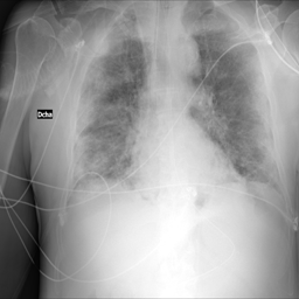

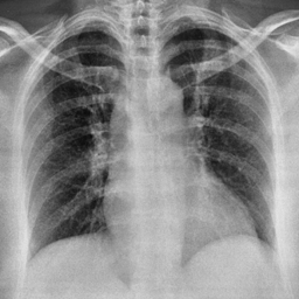

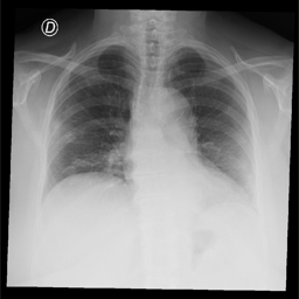


Category: Normal/images


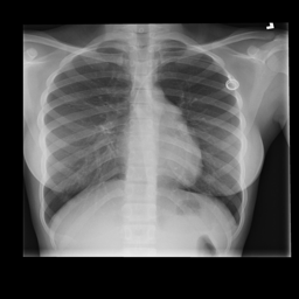

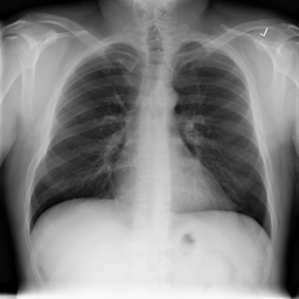

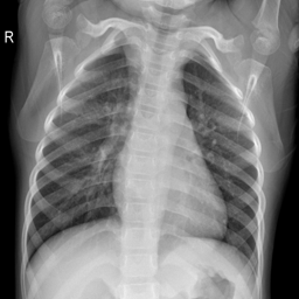


Category: Viral Pneumonia/images


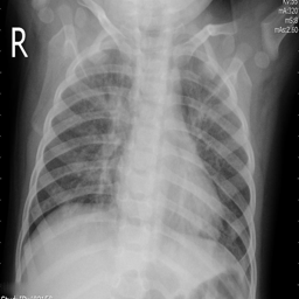

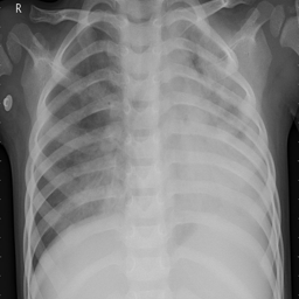

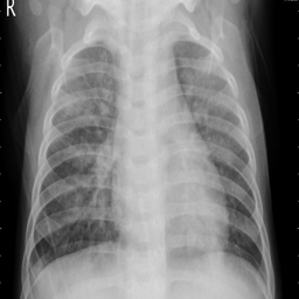

In [ ]:
from IPython.display import Image, display

# Sample Display (modified for compact layout)
for i, category in enumerate(categories):
    print(f"\nCategory: {category}")
    for j in range(min(3, len(fnames[i]))):
        display(Image(filename=fnames[i][j], width=200, height=200))


## Check if the dataset is balanced across classes：

In [ ]:
print('number of images for each category:', [len(f) for f in fnames])
print(fnames[0:2]) #examples of file names
print('The number of images for each category is IMBALANCED! We will do undersampling!')
print("""
Oversampling and undersampling address the balance by respectively increasing the number of instances in underrepresented classes or decreasing the number in overrepresented classes. Data augmentation expands the dataset by generating new, synthetic examples through modifications and transformations of existing data, enhancing the diversity and number of samples in minority classes.

For this project, I chose to implement undersampling, which involved reducing the number of instances in the larger classes to match the smallest class, which has 1345 samples. This approach was selected to maintain computational efficiency and avoid potential overfitting that could arise from artificially inflating the dataset through oversampling or augmentation. By equalizing the number of observations across classes, the model was trained on a balanced dataset, which is crucial for improving the reliability and fairness of the predictions across all categories.

The impact of undersampling on model performance was significant. It helped in mitigating the bias toward the majority class that typically occurs with imbalanced datasets. The model’s ability to generalize improved, evidenced by more balanced accuracy metrics across all classes. However, reducing the number of samples for training might have limited the model's exposure to the full variability of the majority classes, potentially impacting the overall accuracy.
""")

number of images for each category: [3616, 10192, 1345]
[['COVID-19_Radiography_Dataset/COVID/images/COVID-1621.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1608.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1492.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1538.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1594.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1580.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-154.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1524.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1523.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1567.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1554.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1511.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1474.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1534.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1536.png', 'COVID-19_Radiography_Dataset/COVID/images/

In [ ]:
#Reduce number of images to first 1345 for each category
fnames[0]=fnames[0][0:1344]
fnames[1]=fnames[1][0:1344]
fnames[2]=fnames[2][0:1344]

## Reflection:

In [ ]:
print("""

This model aids healthcare professionals by providing rapid and accurate diagnostic assessments, essential for effective patient management and resource allocation, especially during health crises like pandemics. Hospitals can enhance operational efficiency, while public health authorities can better monitor and respond to disease trends. Moreover, patients benefit from faster and more reliable diagnostics, leading to timely treatment.""")



This model aids healthcare professionals by providing rapid and accurate diagnostic assessments, essential for effective patient management and resource allocation, especially during health crises like pandemics. Hospitals can enhance operational efficiency, while public health authorities can better monitor and respond to disease trends. Moreover, patients benefit from faster and more reliable diagnostics, leading to timely treatment.


## Further Preprocessing:

In [ ]:
# Import image, load to array of shape height, width, channels, then min/max transform.
# Write preprocessor that will match up with model's expected input shape.
from keras.preprocessing import image
import numpy as np
from PIL import Image

def preprocessor(img_path):
        img = Image.open(img_path).convert("RGB").resize((192,192)) # import image, make sure it's RGB and resize to height and width you want.
        img = (np.float32(img)-1.)/(255-1.) # min max transformation
        img=img.reshape((192,192,3)) # Create final shape as array with correct dimensions for Keras
        return img



#Try on single flower file (imports file and preprocesses it to data with following shape)
preprocessor('COVID-19_Radiography_Dataset/COVID/images/COVID-2273.png').shape

(192, 192, 3)

In [ ]:
#Import image files iteratively and preprocess them into array of correctly structured data

# Create list of file paths
image_filepaths=fnames[0]+fnames[1]+fnames[2]

# Iteratively import and preprocess data using map function

# map functions apply your preprocessor function one step at a time to each filepath
preprocessed_image_data=list(map(preprocessor,image_filepaths))

# Object needs to be an array rather than a list for Keras (map returns to list object)
X= np.array(preprocessed_image_data) # Assigning to X to highlight that this represents feature input data for our model

In [ ]:
len(image_filepaths)

4032

In [ ]:
print(len(X) ) #same number of elements as filenames
print(X.shape ) #dimensions now 192,192,3 for all images
print(X.min().round() ) #min value of every image is zero
print(X.max() ) #max value of every image is one


4032
(4032, 192, 192, 3)
-0.0
1.0


In [ ]:
# Create y data made up of correctly ordered labels from file folders
from itertools import repeat

# Recall that we have five folders with the following number of images in each folder
#...corresponding to each flower type

print('number of images for each category:', [len(f) for f in fnames])
covid=list(repeat("COVID", 1344))
normal=list(repeat("NORMAL", 1344))
pneumonia=list(repeat("PNEUMONIA", 1344))

#combine into single list of y labels
y_labels = covid+normal+pneumonia

#check length, same as X above
print(len(y_labels) )

# Need to one hot encode for Keras.  Let's use Pandas

import pandas as pd
y=pd.get_dummies(y_labels)

display(y)

number of images for each category: [1344, 1344, 1344]
4032


COVID  NORMAL  PNEUMONIA
0      True   False      False
1      True   False      False
2      True   False      False
3      True   False      False
4      True   False      False
...     ...     ...        ...
4027  False   False       True
4028  False   False       True
4029  False   False       True
4030  False   False       True
4031  False   False       True

[4032 rows x 3 columns]

### Check sample image after preprocessing

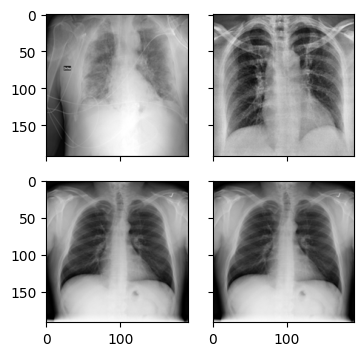

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import random

im1 =preprocessor(fnames[0][0])
im2 =preprocessor(fnames[0][1])
im3 =preprocessor(fnames[1][1])
im4 =preprocessor(fnames[1][1])

fig = plt.figure(figsize=(4., 4.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.25,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [im1, im2, im3, im4]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
plt.show()

## Train Test Split

In [ ]:
# ======Train test split resized images (Hackathon Note!! Use same train test split to be able to submit predictions to leaderboard!)=======================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.32, random_state = 1987)


X_test.shape, y_test.shape

((1291, 192, 192, 3), (1291, 3))

In [ ]:
#Clear objects from memory
del(X)
del(y)
del(preprocessed_image_data)

In [ ]:
#Save data to be able to reload quickly if memory crashes or if you run Runtime>Restart Runtime
import pickle

# Open a file and use dump()
with open('X_train.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(X_train, file)

with open('X_test.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(X_test, file)

with open('y_train.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(y_train, file)

with open('y_test.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(y_test, file)

In [ ]:
#If you run out of Colab memory restart runtime, reload data and try again
import pickle

# Open the file in binary mode
with open('X_train.pkl', 'rb') as file:
    # Call load method to deserialze
    X_train = pickle.load(file)

# Open the file in binary mode
with open('y_train.pkl', 'rb') as file:
    # Call load method to deserialze
    y_train = pickle.load(file)

with open('X_test.pkl', 'rb') as file:
    # Call load method to deserialze
    X_test = pickle.load(file)

with open('y_test.pkl', 'rb') as file:
    # Call load method to deserialze
    y_test = pickle.load(file)

# 2 Baseline CNN Model

## Baseline CNN Model Architecture and Training

## Model Architecture
The baseline Convolutional Neural Network (CNN) designed for image classification includes:
- **Initial Layer**: `Conv2D` layer with 32 filters of size 3x3, using ReLU activation, designed to capture basic image features.
- **Pooling Layers**: `MaxPooling2D` layers following each convolutional layer to reduce spatial dimensions, thereby condensing the image information.
- **Additional Convolutional Layers**: Increasing complexity with 64 and then 128 filters in subsequent `Conv2D` layers, each followed by max pooling, to abstract and compress the image features further.
- **Flattening**: Flattening the pooled features into a one-dimensional vector to prepare for dense layers.
- **Dense Layer and Dropout**: A dense layer with 128 units followed by a 50% dropout layer to prevent overfitting by randomly omitting units during training.
- **Output Layer**: Final dense layer with 3 units and a softmax activation function suitable for multi-class classification of three categories.

## Loss Function and Optimizer
- **Loss Function**: `CategoricalCrossentropy`, appropriate for multi-class classification where the target labels are one-hot encoded.
- **Optimizer**: `Adam`, chosen for its efficient computation and adaptive learning rate properties, facilitating faster convergence.

## Evaluation Metrics and Training Configuration
- **Evaluation Metric**: Accuracy, measuring the percentage of correctly predicted labels, providing an intuitive understanding of the model's performance.
- **Training Configuration**: The model is trained over 20 epochs with a batch size of 32. We use 20% of the training data as a validation set to monitor performance and mitigate overfitting.

## Performance Visualization
- **Plots**: Training and validation accuracy and loss are plotted to visually assess the model's learning behavior and diagnose issues like overfitting or underfitting.

The following cells will set up the model architecture, compile the model, train it on the provided datasets, and evaluate its performance, including visualization of the training process.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 190, 190, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 95, 95, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 93, 93, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 46, 46, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 44, 44, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       7,929,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,023,619 (30.61 MB)

 Trainable params: 8,023,619 (30.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 13s 109ms/step - accuracy: 0.5276 - loss: 0.9702 - val_accuracy: 0.7632 - val_loss: 0.5855
Epoch 2/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7890 - loss: 0.5371 - val_accuracy: 0.8306 - val_loss: 0.4924
Epoch 3/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8477 - loss: 0.3930 - val_accuracy: 0.8142 - val_loss: 0.5161
Epoch 4/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8911 - loss: 0.2989 - val_accuracy: 0.8415 - val_loss: 0.4574
Epoch 5/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9030 - loss: 0.2359 - val_accuracy: 0.8725 - val_loss: 0.3577
Epoch 6/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9196 - loss: 0.2093 - val_accuracy: 0.9016 - val_loss: 0.3337
Epoch 7/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9432 - loss: 0.1618 - val_accuracy: 0.8798 - val_loss: 0.4009
Epoch 8/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9326 - loss: 0.1701 - val_accuracy: 0.8725 -

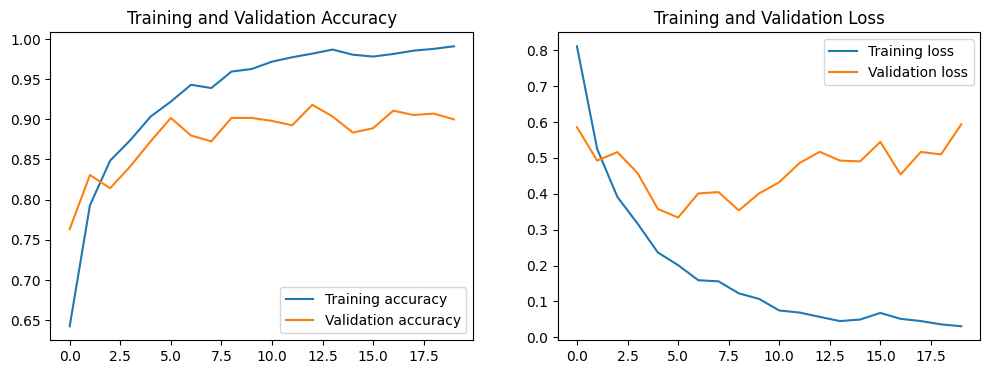

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy


image_height, image_width, channels = 192, 192, 3

# Define the CNN architecture
model_CNN = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, channels)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Assuming 3 classes as per your categories
])

# Compile the model
model_CNN.compile(
    optimizer=Adam(),
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Model summary
model_CNN.summary()

# Train the model
history_CNN = model_CNN.fit(
    X_train, y_train,
    validation_split=0.2,  # Using 20% of the training data for validation
    epochs=20,
    batch_size=32
)

# Evaluate the model on the test set
test_loss_CNN, test_accuracy_CNN = model_CNN.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy_CNN*100:.2f}%, Test loss: {test_loss_CNN}")

# Optionally, visualize the training process
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_CNN.history['accuracy'], label='Training accuracy')
plt.plot(history_CNN.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_CNN.history['loss'], label='Training loss')
plt.plot(history_CNN.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
with open('model_CNN.pkl', 'wb') as file:
    pickle.dump(model_CNN, file)

with open('history_CNN.pkl', 'wb') as file:
    pickle.dump(history_CNN, file)

# 3 Transfer Learning with ResNet

## ResNet Model Architecture and Training with Transfer Learning

## Model Architecture
The ResNet model adapted for this task leverages the pre-trained ResNet50 architecture, renowned for its depth and ability to handle complex image recognition tasks:
- **Base Model**: ResNet50 loaded with weights pre-trained on the ImageNet dataset, excluding the top layer to make it suitable for fine-tuning to our specific classification task.
- **Global Average Pooling**: A `GlobalAveragePooling2D` layer follows the base ResNet layers, reducing each feature map to a single value and helping to minimize overfitting by reducing the total number of parameters in the model.
- **Output Layer**: A `Dense` layer with 3 units and a softmax activation function is used to output probabilities across the three classes, tailoring the model to our classification needs.

## Loss Function and Optimizer
- **Loss Function**: `CategoricalCrossentropy` is used to handle multi-class classification tasks, fitting as our labels are one-hot encoded.
- **Optimizer**: `Adam` optimizer is employed for its adaptive learning rate capability, which helps in converging quicker to the optimal weights.

## Evaluation Metrics and Training Configuration
- **Evaluation Metric**: Accuracy is employed as the primary metric to gauge the correct classifications relative to the total number of predictions made.
- **Training Configuration**: The model is fine-tuned for 10 epochs with a batch size of 32, utilizing 20% of the training data as a validation subset. This shorter training period is due to leveraging the robust feature-extraction capabilities already developed through the ResNet model's initial training on ImageNet.

## Performance Visualization
- **Plots**: We visualize the training and validation accuracy and loss to assess the learning behavior of the model. These plots are crucial for identifying any signs of overfitting or underfitting and confirming the model's generalization capability over unseen data.

The following cells will establish the ResNet model architecture, compile the model, conduct training on the dataset provided, and evaluate its performance, alongside visualizations of the training process to illustrate its effectiveness and efficiency.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(192, 192, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of ResNet
x = GlobalAveragePooling2D()(base_model.output)
predictions = Dense(3, activation='softmax')(x)  # Assuming 3 classes

# Create the final model and rename to model_res
model_res = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_res.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Model summary
model_res.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 192, 192, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 198, 198, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 96, 96, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 96, 96, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 96, 96, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 98, 98, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 48, 48, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 48, 48, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 48, 48, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 48, 48, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 48, 48, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 48, 48, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 48, 48, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 48, 48, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 48, 48, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,593,859 (90.00 MB)

 Trainable params: 6,147 (24.01 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


69/69 ━━━━━━━━━━━━━━━━━━━━ 26s 210ms/step - accuracy: 0.3317 - loss: 1.1134 - val_accuracy: 0.3266 - val_loss: 1.0833
Epoch 2/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.4093 - loss: 1.0819 - val_accuracy: 0.5456 - val_loss: 1.0648
Epoch 3/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.4726 - loss: 1.0632 - val_accuracy: 0.4051 - val_loss: 1.0541
Epoch 4/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.4624 - loss: 1.0509 - val_accuracy: 0.4124 - val_loss: 1.0412
Epoch 5/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.4665 - loss: 1.0328 - val_accuracy: 0.4781 - val_loss: 1.0231
Epoch 6/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.5511 - loss: 1.0136 - val_accuracy: 0.3230 - val_loss: 1.0396
Epoch 7/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.4961 - loss: 1.0206 - val_accuracy: 0.4526 - val_loss: 1.0101
Epoch 8/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.5363 - loss: 0.9929 - val_accuracy: 0.6241 - val

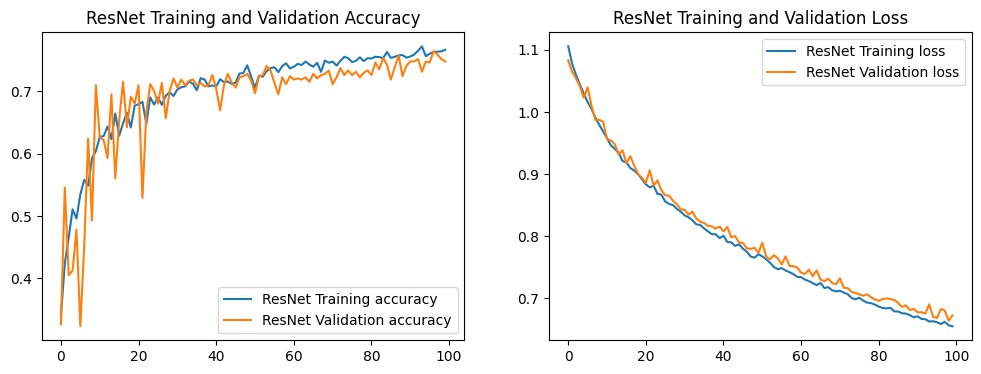

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# Prepare data using ImageDataGenerator
train_datagen = ImageDataGenerator(validation_split=0.2)
train_generator = train_datagen.flow(X_train, y_train, subset='training', batch_size=32)
validation_generator = train_datagen.flow(X_train, y_train, subset='validation', batch_size=32)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# Train the model
history_res = model_res.fit(train_generator,
                           validation_data=validation_generator,
                           epochs=100,
                           callbacks=[early_stopping])  # Reduced epochs due to pre-trained weights

# Evaluate the model on the test set
test_loss_res, test_accuracy_res = model_res.evaluate(X_test, y_test)
print(f"ResNet Test accuracy: {test_accuracy_res*100:.2f}%, Test loss: {test_loss_res}")

# Optionally, visualize the training process of ResNet
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_res.history['accuracy'], label='ResNet Training accuracy')
plt.plot(history_res.history['val_accuracy'], label='ResNet Validation accuracy')
plt.title('ResNet Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_res.history['loss'], label='ResNet Training loss')
plt.plot(history_res.history['val_loss'], label='ResNet Validation loss')
plt.title('ResNet Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
with open('model_res.pkl', 'wb') as file:
    pickle.dump(model_res, file)
with open('history_res.pkl', 'wb') as file:
    pickle.dump(history_res, file)

## Discussion on Lower Test Accuracy of ResNet Compared to Baseline CNN

Several factors might contribute to the observed lower test accuracy of the ResNet model when compared to the baseline CNN. Here are potential explanations:


- **Mismatch Between Pre-trained Features and New Data**: The features learned by ResNet50 on the ImageNet dataset might not transfer well to the specific task at hand. ImageNet contains a broad range of images that might differ significantly from the specific types of images (e.g., medical images) in the training dataset, leading to a mismatch in feature relevance.

- **Model Complexity and Dataset Specificity**: The baseline CNN, being less complex, might be better suited for the dataset if the distinguishing features between classes are relatively simple. In such cases, simpler models are less likely to overlearn the noise in the training data and thus generalize better on the test data.

- **Batch Size and Training Dynamics**: The chosen batch size and other training parameters might also influence how well the ResNet model learns. Smaller or larger batch sizes can affect the stability of the training process, impacting the final model performance on the test set.

These factors suggest that adjustments in the model architecture, training process, or data handling might be needed to enhance the ResNet model's performance and ensure it outperforms or matches the baseline CNN in future experiments.


# 4 Additional Architectures

## 4.1 Retarined ResNet  
## Fully Retrained ResNet Model Architecture and Training with Early Stopping

## Model Architecture
The fully retrained ResNet model (`model_res_retrained`) is based on the robust architecture of ResNet50, but without utilizing pre-trained weights. This approach is designed to tailor the learning specifically to our dataset from the ground up:
- **Base Model**: ResNet50 architecture is employed but initialized without weights from ImageNet, allowing the model to learn features purely relevant to our specific classification task.
- **Global Average Pooling**: Following the ResNet base layers, a `GlobalAveragePooling2D` layer condenses each feature map to a single value, which helps in minimizing the model's complexity and reducing the risk of overfitting.
- **Output Layer**: The model concludes with a `Dense` layer comprising 3 units with a softmax activation function, designed to classify the images into three distinct categories based on the learned features.

## Loss Function and Optimizer
- **Loss Function**: `CategoricalCrossentropy` is utilized, suitable for our one-hot encoded labels in a multi-class classification scenario.
- **Optimizer**: The `Adam` optimizer is chosen for its efficient and adaptive learning rate capabilities, which are essential for converging to optimal weights, especially when training from scratch.

## Evaluation Metrics and Training Configuration
- **Evaluation Metric**: Accuracy is used as the primary metric to assess the effectiveness of the model in correctly classifying the images.
- **Training Configuration**: The model is configured to train potentially up to 50 epochs with a batch size of 32, but includes an early stopping mechanism. Early stopping monitors the validation loss and halts training if there is no improvement for three consecutive epochs, helping prevent overtraining and ensuring that the model generalizes well to unseen data.

## Performance Visualization
- **Plots**: We provide visualizations of the training and validation accuracy and loss. These plots are crucial in observing the training dynamics and evaluating the effectiveness of the early stopping in preventing overfitting while maximizing performance.

This configuration ensures that the `model_res_retrained` is optimally trained to adapt to our specific dataset without the influence of pre-trained weights, potentially enhancing its ability to generalize well to new data while maintaining a robust learning process.


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 192, 192, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 198, 198, 3)    │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 96, 96, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 96, 96, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 96, 96, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 98, 98, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 48, 48, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 48, 48, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 48, 48, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 48, 48, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 48, 48, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 48, 48, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 48, 48, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 48, 48, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 48, 48, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,593,859 (90.00 MB)

 Trainable params: 23,540,739 (89.80 MB)

 Non-trainable params: 53,120 (207.50 KB)

Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


69/69 ━━━━━━━━━━━━━━━━━━━━ 83s 535ms/step - accuracy: 0.5885 - loss: 1.5964 - val_accuracy: 0.3212 - val_loss: 7.0555
Epoch 2/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 16s 233ms/step - accuracy: 0.8264 - loss: 0.4585 - val_accuracy: 0.3212 - val_loss: 6.1293
Epoch 3/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 16s 228ms/step - accuracy: 0.8716 - loss: 0.3522 - val_accuracy: 0.3212 - val_loss: 7.2804
Epoch 4/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 16s 230ms/step - accuracy: 0.8785 - loss: 0.3333 - val_accuracy: 0.5237 - val_loss: 2.7886
Epoch 5/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 16s 229ms/step - accuracy: 0.8973 - loss: 0.2800 - val_accuracy: 0.5164 - val_loss: 1.4754
Epoch 6/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 16s 228ms/step - accuracy: 0.8924 - loss: 0.2862 - val_accuracy: 0.5420 - val_loss: 2.3336
Epoch 7/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 16s 231ms/step - accuracy: 0.9024 - loss: 0.2417 - val_accuracy: 0.7482 - val_loss: 0.7072
Epoch 8/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 16s 229ms/step - accuracy: 0.9262 - loss: 0.2035 - val_accuracy

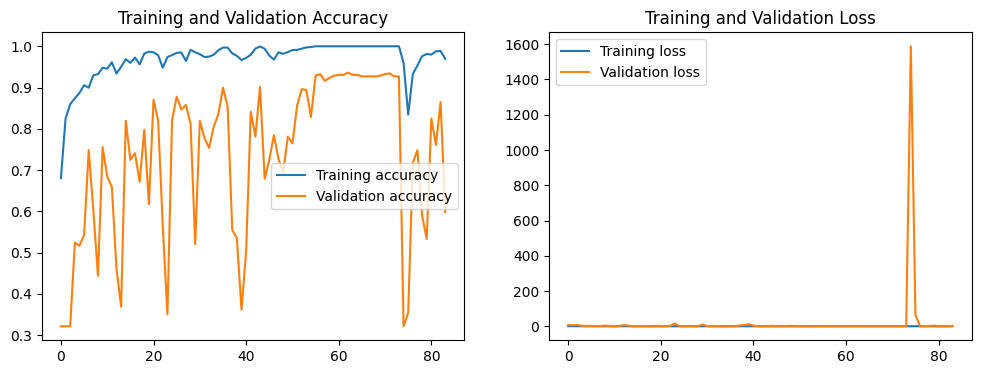

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load the ResNet50 model without pre-trained weights
base_model = ResNet50(weights=None, include_top=False, input_shape=(192, 192, 3))

# Set all layers to be trainable
for layer in base_model.layers:
    layer.trainable = True

# Add custom layers on top of ResNet
x = GlobalAveragePooling2D()(base_model.output)
predictions = Dense(3, activation='softmax')(x)  # Assuming 3 classes

# Create the final model and rename to model_res_retrained
model_res_retrained = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_res_retrained.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Model summary
model_res_retrained.summary()

# Prepare data using ImageDataGenerator
train_datagen = ImageDataGenerator(validation_split=0.2)
train_generator = train_datagen.flow(X_train, y_train, subset='training', batch_size=32)
validation_generator = train_datagen.flow(X_train, y_train, subset='validation', batch_size=32)

# Setup early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, restore_best_weights=True)

# Train the model
history_res_retrained = model_res_retrained.fit(train_generator,
                           validation_data=validation_generator,
                           epochs=150,  # Set a higher potential max epochs
                           callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss_res_retrained, test_accuracy_res_retrained = model_res_retrained.evaluate(X_test, y_test)
print(f"Retrained ResNet Test accuracy: {test_accuracy_res_retrained*100:.2f}%, Test loss: {test_loss_res_retrained}")

# Optionally, visualize the training process
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_res_retrained.history['accuracy'], label='Training accuracy')
plt.plot(history_res_retrained.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_res_retrained.history['loss'], label='Training loss')
plt.plot(history_res_retrained.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
with open('model_res_retrained.pkl', 'wb') as file:
    pickle.dump(model_res_retrained, file)
with open('history_res_retrained.pkl', 'wb') as file:
    pickle.dump(history_res_retrained, file)

## 4.2 More advanced CNN  
## Advanced CNN Model Architecture and Training (`model_pro`) with Early Stopping

## Model Architecture
The advanced CNN model, referred to as `model_pro`, enhances the baseline architecture by incorporating additional convolutional layers, increased filter numbers, and inclusion of batch normalization and more dropout layers to manage the complexity and mitigate overfitting:
- **Initial Layers**: Start with two `Conv2D` layers with 64 filters each, followed by `MaxPooling2D`. This setup increases the model's ability to capture more complex features at the beginning of the network.
- **Middle Layers**: Continue with two sets of double `Conv2D` layers with increasing filters (128 and 256), each set followed by a `MaxPooling2D` layer. This structure allows deeper extraction of image features.
- **Batch Normalization**: Each convolutional layer is followed by `BatchNormalization` which normalizes the activations of the previous layer at each batch, maintaining mean output close to 0 and the output standard deviation close to 1. This helps in accelerating the training process and stabilizing the learning environment.
- **Flattening and Dense Layers**: Flatten the output from the convolutional layers to feed into the dense network, which includes a dense layer with 256 units followed by a dropout layer.
- **Output Layer**: Conclude with a `Dense` layer of 3 units and a softmax activation to classify into three categories.

## Loss Function and Optimizer
- **Loss Function**: `CategoricalCrossentropy`, ideal for multi-class classification tasks where labels are one-hot encoded.
- **Optimizer**: Use `Adam` optimizer, which adjusts the learning rate throughout training, providing an optimal approach for this more complex model.

## Evaluation Metrics and Training Configuration
- **Evaluation Metric**: Accuracy remains the metric of choice to evaluate the performance, providing direct insight into the proportion of correct predictions.
- **Training Configuration**: Train the model over a sufficient number of epochs with a batch size of 32, incorporating callbacks such as Early Stopping to monitor validation loss and prevent overfitting.

## Performance Visualization
- **Plots**: Training and validation accuracy and loss are plotted to monitor the model's effectiveness over training epochs, highlighting the impact of added complexity on learning dynamics.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 190, 190, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 188, 188, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 94, 94, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 94, 94, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 92, 92, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 45, 45, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 43, 43, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 41, 41, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 20, 20, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 102400)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │      26,214,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,362,627 (104.38 MB)

 Trainable params: 27,361,731 (104.38 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


69/69 ━━━━━━━━━━━━━━━━━━━━ 62s 546ms/step - accuracy: 0.6156 - loss: 8.2015 - val_accuracy: 0.5511 - val_loss: 4.7928
Epoch 2/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 214ms/step - accuracy: 0.7330 - loss: 0.9569 - val_accuracy: 0.6004 - val_loss: 2.2508
Epoch 3/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 215ms/step - accuracy: 0.7636 - loss: 0.6235 - val_accuracy: 0.5657 - val_loss: 1.7105
Epoch 4/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 214ms/step - accuracy: 0.7866 - loss: 0.5389 - val_accuracy: 0.5420 - val_loss: 6.4755
Epoch 5/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 215ms/step - accuracy: 0.8189 - loss: 0.4562 - val_accuracy: 0.6405 - val_loss: 1.6461
Epoch 6/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 215ms/step - accuracy: 0.8232 - loss: 0.4321 - val_accuracy: 0.7117 - val_loss: 1.0244
Epoch 7/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 214ms/step - accuracy: 0.8249 - loss: 0.4212 - val_accuracy: 0.7883 - val_loss: 0.6811
Epoch 8/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 213ms/step - accuracy: 0.8198 - loss: 0.4469 - val_accuracy

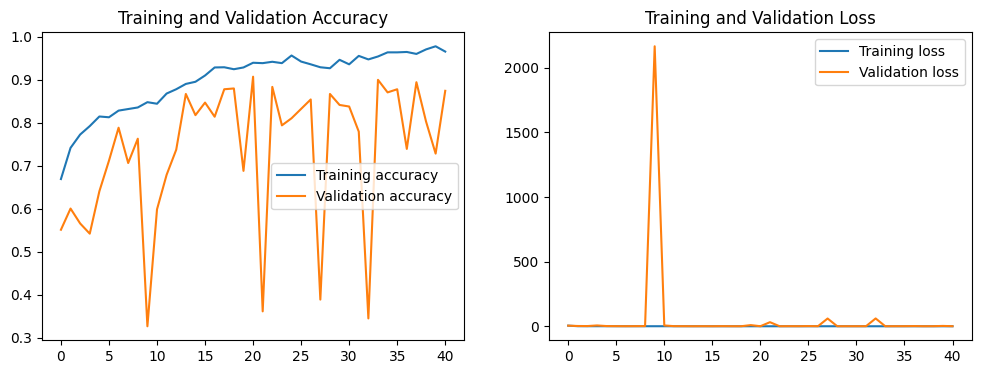

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define the advanced CNN architecture
model_CNN_pro = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(192, 192, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile the model
model_CNN_pro.compile(optimizer=Adam(),
                  loss=CategoricalCrossentropy(),
                  metrics=['accuracy'])

# Model summary
model_CNN_pro.summary()

# Setup early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, restore_best_weights=True)

# Prepare data using ImageDataGenerator
train_datagen = ImageDataGenerator(validation_split=0.2)
train_generator = train_datagen.flow(X_train, y_train, subset='training', batch_size=32)
validation_generator = train_datagen.flow(X_train, y_train, subset='validation', batch_size=32)

# Train the model with early stopping
history_CNN_pro = model_CNN_pro.fit(train_generator,
                                  validation_data=validation_generator,
                                  epochs=150,  # Set a higher potential max epochs
                                  callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss_CNN_pro, test_accuracy_CNN_pro = model_CNN_pro.evaluate(X_test, y_test)
print(f"Advanced Model Pro Test accuracy: {test_accuracy_CNN_pro*100:.2f}%, Test loss: {test_loss_CNN_pro}")

# Optionally, visualize the training process
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_CNN_pro.history['accuracy'], label='Training accuracy')
plt.plot(history_CNN_pro.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_CNN_pro.history['loss'], label='Training loss')
plt.plot(history_CNN_pro.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
with open('model_CNN_pro.pkl', 'wb') as file:
    pickle.dump(model_CNN_pro, file)
with open('history_CNN_pro.pkl', 'wb') as file:
    pickle.dump(history_CNN_pro, file)

## 4.3 VGG16
## Fine-Tuning VGG16 for Image Classification (`model_VGG`)

## Model Architecture
The `model_VGG` utilizes the VGG16 architecture, which is renowned for its depth and effectiveness in image classification tasks, initially trained on the vast ImageNet dataset. This model has been adapted for our specific classification needs:
- **Base Model**: We start with the VGG16 model, utilizing its pre-trained weights from ImageNet. This model is known for its robustness and deep architecture featuring multiple convolutional layers.
- **Customization**: The top of the model (originally designed for 1000 classes) is replaced with new layers tailored for our dataset, which includes:
  - `GlobalAveragePooling2D` to reduce feature dimensions and prevent overfitting.
  - A `Dense` layer with 512 units followed by a `Dropout` layer at 50% to further mitigate overfitting.
  - A final `Dense` layer with 3 units and a softmax activation function, set up to output probabilities across our three target categories.

## Training Configuration and Optimization
- **Freezing Layers**: The convolutional layers of the base VGG16 model are frozen, meaning their weights will not be updated during training. This focuses training on the newly added top layers.
- **Loss Function**: `CategoricalCrossentropy` is used, which is ideal for multi-class classification problems with one-hot encoded labels.
- **Optimizer**: The `Adam` optimizer is selected for its adaptive learning rate capabilities, helping to quickly converge to the optimal solution while fine-tuning.
- **Early Stopping**: To avoid overfitting and optimize training time, early stopping monitors the validation loss, stopping training if there's no improvement for three consecutive epochs. This is complemented by `restore_best_weights` to ensure the model retains the best possible configuration from training.

## Evaluation Metrics
- **Accuracy**: This metric is critical for understanding the percentage of correctly classified images, providing a clear measure of model performance.
- **Validation Strategy**: The model is validated during training using a subset of the data (20% of training data), which helps gauge the model's generalization to new data.

## Visualization
- **Training and Validation Curves**: We plot both accuracy and loss for training and validation phases to visually assess the model's learning progress and identify any signs of overfitting or underfitting.

This setup ensures that `model_VGG` leverages the sophisticated feature-detection capabilities of VGG16 while being efficiently adapted to our specific classification task. The use of early stopping and other strategies helps maintain an optimal balance between training duration and model effectiveness.


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 192, 192, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 192, 192, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 192, 192, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 96, 96, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 96, 96, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 96, 96, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 48, 48, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 48, 48, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 48, 48, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 48, 48, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 24, 24, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 24, 24, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 24, 24, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 24, 24, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         262,6

 Total params: 14,978,883 (57.14 MB)

 Trainable params: 264,195 (1.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


69/69 ━━━━━━━━━━━━━━━━━━━━ 31s 308ms/step - accuracy: 0.5015 - loss: 0.9962 - val_accuracy: 0.7847 - val_loss: 0.5845
Epoch 2/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 12s 177ms/step - accuracy: 0.7671 - loss: 0.5970 - val_accuracy: 0.8175 - val_loss: 0.4750
Epoch 3/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 12s 175ms/step - accuracy: 0.8044 - loss: 0.4869 - val_accuracy: 0.8668 - val_loss: 0.4304
Epoch 4/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 12s 173ms/step - accuracy: 0.8327 - loss: 0.4374 - val_accuracy: 0.8741 - val_loss: 0.3571
Epoch 5/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 12s 171ms/step - accuracy: 0.8620 - loss: 0.3803 - val_accuracy: 0.8577 - val_loss: 0.3635
Epoch 6/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 12s 171ms/step - accuracy: 0.8644 - loss: 0.3396 - val_accuracy: 0.8887 - val_loss: 0.3175
Epoch 7/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 12s 171ms/step - accuracy: 0.8656 - loss: 0.3204 - val_accuracy: 0.8704 - val_loss: 0.3201
Epoch 8/150
69/69 ━━━━━━━━━━━━━━━━━━━━ 12s 173ms/step - accuracy: 0.8595 - loss: 0.3239 - val_accuracy

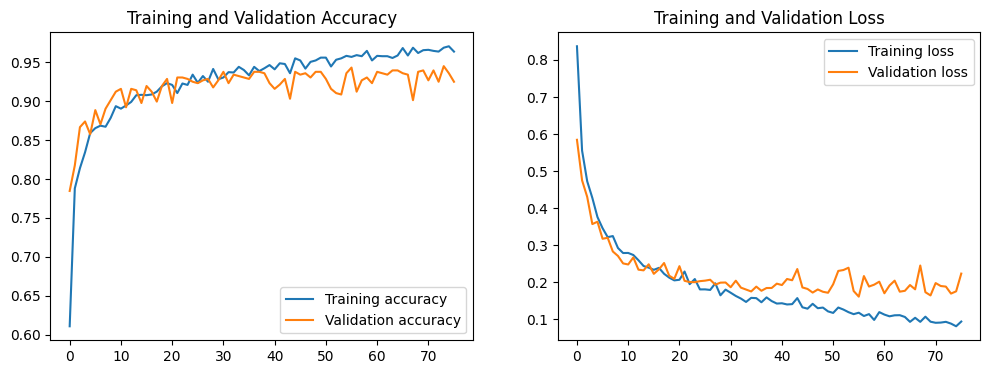

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load the VGG16 model, pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(192, 192, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)  # Assuming 3 classes

# Create the final model
model_VGG = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_VGG.compile(optimizer=Adam(),
                  loss=CategoricalCrossentropy(),
                  metrics=['accuracy'])

# Model summary
model_VGG.summary()

# Prepare data using ImageDataGenerator
train_datagen = ImageDataGenerator(validation_split=0.2)
train_generator = train_datagen.flow(X_train, y_train, subset='training', batch_size=32)
validation_generator = train_datagen.flow(X_train, y_train, subset='validation', batch_size=32)

# Setup early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history_VGG = model_VGG.fit(train_generator,
                            validation_data=validation_generator,
                            epochs=150,  # Adjust epochs according to your needs
                            callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss_VGG, test_accuracy_VGG = model_VGG.evaluate(X_test, y_test)
print(f"VGG16 Fine-tuned Model Test accuracy: {test_accuracy_VGG*100:.2f}%, Test loss: {test_loss_VGG}")

# Optionally, visualize the training process
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_VGG.history['accuracy'], label='Training accuracy')
plt.plot(history_VGG.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_VGG.history['loss'], label='Training loss')
plt.plot(history_VGG.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
with open('model_VGG.pkl', 'wb') as file:
    pickle.dump(model_VGG, file)
with open('history_VGG.pkl', 'wb') as file:
    pickle.dump(history_VGG, file)

# 5 Performance Comparison

In [ ]:
model_test_results = {
    'model_CNN': {
        'test_loss':test_loss_CNN,
        'test_accuracy': test_accuracy_CNN
    },
    'model_res': {
        'test_loss': test_loss_res,
        'test_accuracy': test_accuracy_res
    },
    'model_res_retrained': {
        'test_loss': test_loss_res_retrained,
        'test_accuracy': test_accuracy_res_retrained
    },
    'model_CNN_pro': {
        'test_loss': test_loss_CNN_pro,
        'test_accuracy': test_accuracy_CNN_pro
    },
    'model_VGG': {
        'test_loss': test_loss_VGG,
        'test_accuracy': test_accuracy_VGG
    }
}

with open('model_test_results.pkl', 'wb') as file:
    pickle.dump(model_test_results, file)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

model_CNN = pd.read_pickle('model_CNN.pkl')
model_res = pd.read_pickle('model_res.pkl')
model_res_retrained = pd.read_pickle('model_res_retrained.pkl')
model_pro = pd.read_pickle('model_CNN_pro.pkl')
model_VGG = pd.read_pickle('model_VGG.pkl')

history_CNN = pd.read_pickle('history_CNN.pkl')
history_res = pd.read_pickle('history_res.pkl')
history_res_retrained = pd.read_pickle('history_res_retrained.pkl')
history_CNN_pro = pd.read_pickle('history_CNN_pro.pkl')
history_VGG = pd.read_pickle('history_VGG.pkl')

model_test_results = pd.read_pickle('model_test_results.pkl')
test_loss_CNN = model_test_results['model_CNN']['test_loss']
test_accuracy_CNN = model_test_results['model_CNN']['test_accuracy']
test_loss_res = model_test_results['model_res']['test_loss']
test_accuracy_res = model_test_results['model_res']['test_accuracy']
test_loss_res_retrained = model_test_results['model_res_retrained']['test_loss']
test_accuracy_res_retrained = model_test_results['model_res_retrained']['test_accuracy']
test_loss_CNN_pro = model_test_results['model_CNN_pro']['test_loss']
test_accuracy_CNN_pro = model_test_results['model_CNN_pro']['test_accuracy']
test_loss_VGG = model_test_results['model_VGG']['test_loss']
test_accuracy_VGG = model_test_results['model_VGG']['test_accuracy']


# First, gather the necessary data from each model
models = {
    'model_CNN': model_CNN,              # baseline CNN
    'model_res': model_res,              # pre-trained resnet
    'model_res_retrained': model_res_retrained,    # retrained resnet
    'model_CNN_pro': model_CNN_pro,            # more layer CNN
    'model_VGG': model_VGG              # pre-trained VGG16
}

# Create a dictionary to hold the data
data = {
    'Model': [],
    'Test Loss': [],
    'Test Accuracy': [],
    'Total Parameters': [],
    'Trainable Parameters': []
}

# Populate the dictionary with data from each model
for name, model in models.items():
    suffix = '_'.join(name.split('_')[1:])  # Join parts to handle names like 'model_CNN_pro'
    test_loss = globals()[f"test_loss_{suffix}"]
    test_accuracy = globals()[f"test_accuracy_{suffix}"] * 100  # Convert to percentage
    total_params = model.count_params()
    trainable_params = sum([tf.size(p).numpy() for p in model.trainable_weights])

    data['Model'].append(name)
    data['Test Loss'].append(test_loss)
    data['Test Accuracy'].append(test_accuracy)
    data['Total Parameters'].append(total_params)
    data['Trainable Parameters'].append(trainable_params)

# Create DataFrame
df_models = pd.DataFrame(data)

# Display the DataFrame
display(df_models)

Model  Test Loss  Test Accuracy  Total Parameters  \
0            model_CNN   0.548303      89.930284           8023619   
1            model_res   0.664706      75.987607          23593859   
2  model_res_retrained   0.331544      93.493414          23593859   
3        model_CNN_pro   0.434049      91.324556          27362627   
4            model_VGG   0.186616      93.183577          14978883   

   Trainable Parameters  
0               8023619  
1                  6147  
2              23540739  
3              27361731  
4                264195

For the hyperparameters, I maintained stepsize all the same across all the models, which is set to the default value of Adam optimizer, which is 0.001. The optimizer are all Adam, and the loss functions are all CategoricalCrossentropy. The epoch numbers are cleverly defined using early stop in each senarios. The batch_size are all intentionally set to 32.  
I intentionally set all those hyperparameters the same because I want to mainly focus on the difference in architecture. I want to study how the difference in number of layers and difference in ways of connections could affect model performance. The OOS test result is shown in the above, and the history of training is shown below.

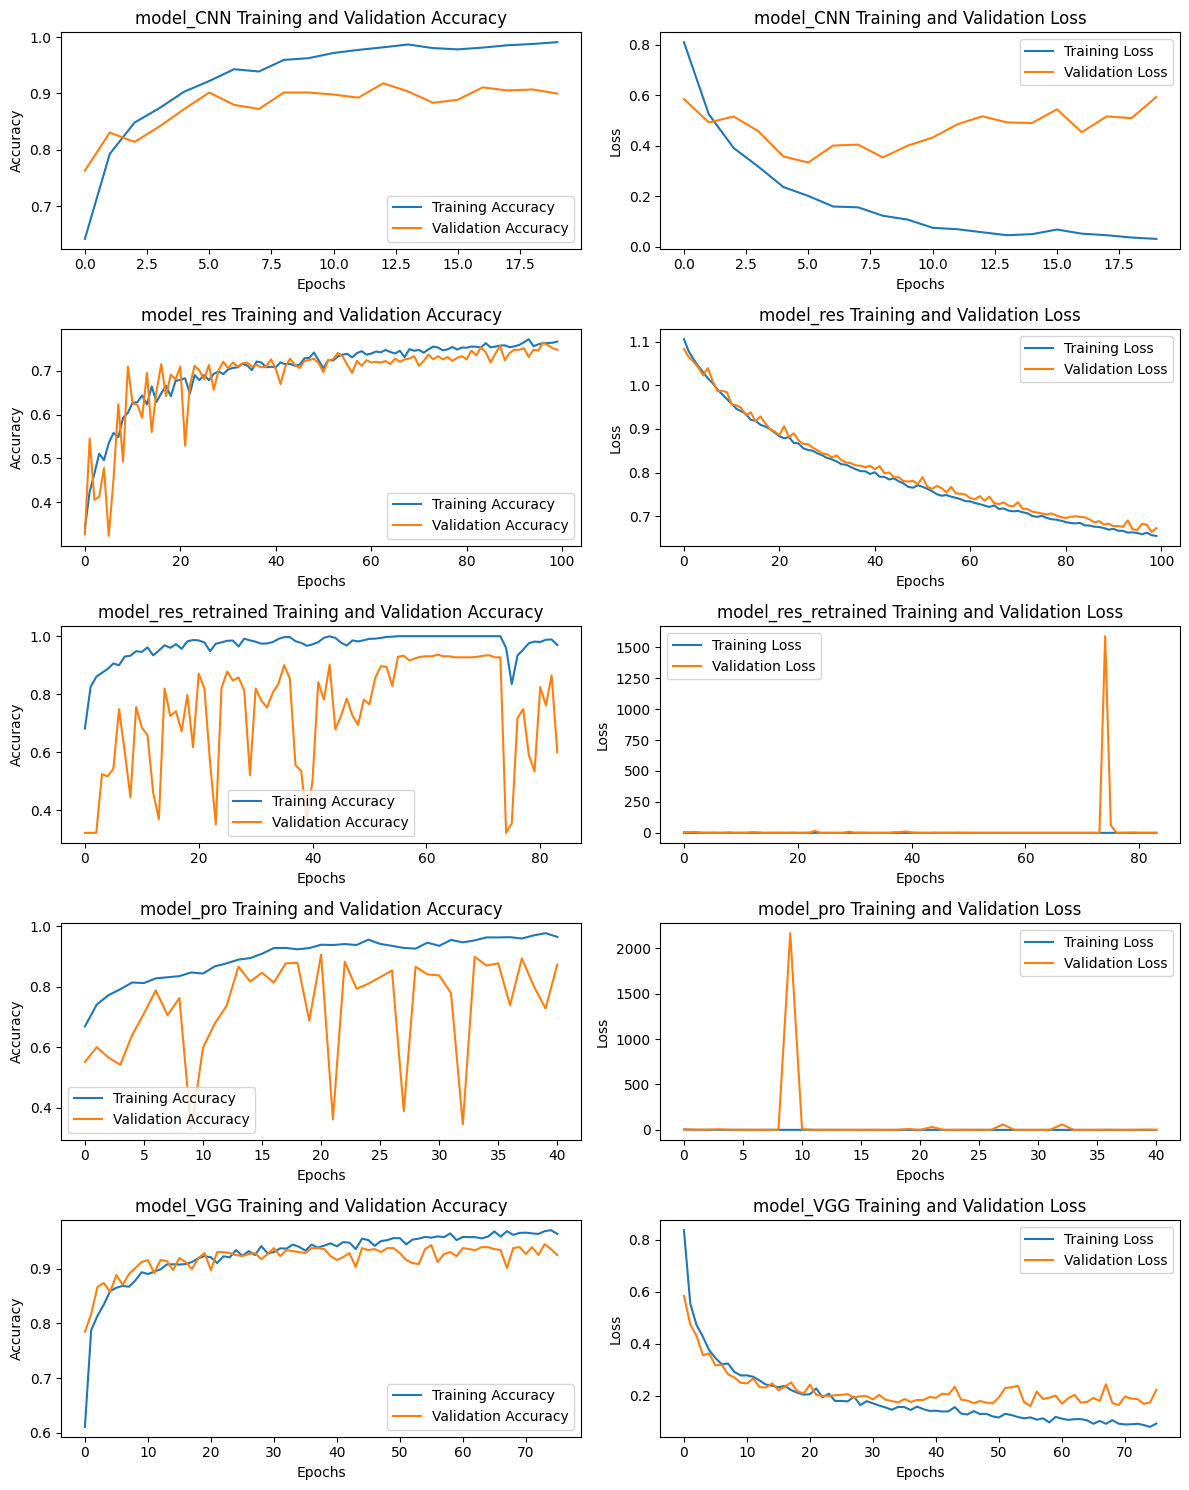

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the following histories from your models
histories = {
    'model_CNN': history_CNN,
    'model_res': history_res,
    'model_res_retrained': history_res_retrained,
    'model_pro': history_CNN_pro,
    'model_VGG': history_VGG
}

# Number of plots
num_models = len(histories)
fig, axs = plt.subplots(num_models, 2, figsize=(12, 3 * num_models))  # 2 columns for accuracy and loss

for i, (name, history) in enumerate(histories.items()):
    # Plot training and validation accuracy
    axs[i, 0].plot(history.history['accuracy'], label='Training Accuracy')
    axs[i, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axs[i, 0].set_title(f'{name} Training and Validation Accuracy')
    axs[i, 0].set_xlabel('Epochs')
    axs[i, 0].set_ylabel('Accuracy')
    axs[i, 0].legend()

    # Plot training and validation loss
    axs[i, 1].plot(history.history['loss'], label='Training Loss')
    axs[i, 1].plot(history.history['val_loss'], label='Validation Loss')
    axs[i, 1].set_title(f'{name} Training and Validation Loss')
    axs[i, 1].set_xlabel('Epochs')
    axs[i, 1].set_ylabel('Loss')
    axs[i, 1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# 6 Augmentation

## Enhanced Training of ResNet50 with Data Augmentation (`model_res_retrained_aug`)

### Model Overview
The `model_res_retrained_aug` leverages the architecture of ResNet50, a powerful deep neural network, known for its effectiveness in large-scale image recognition tasks. Unlike its predecessors, this model is trained from scratch without leveraging pre-trained weights and incorporates data augmentation to improve its robustness and ability to generalize from the training data.

### Architecture Adjustments
- **Base Model**: Utilizes ResNet50's architecture, excluding the top layer to allow customization for our specific task of classifying images into three categories.
- **Global Average Pooling**: Reduces each feature map to a single vector, decreasing the model's complexity and computational demand.
- **Output Layer**: A dense layer with three units (one per class) uses softmax activation to output class probabilities.

### Data Augmentation
To enhance the model's ability to generalize and perform well on unseen data, data augmentation techniques are applied during training:
- **Rotation**: Random rotations of up to 20 degrees help the model handle varying orientations.
- **Width and Height Shifts**: Shifts of up to 20% in both dimensions teach the model to recognize objects that aren't perfectly centered.
- **Shear**: Introduces shear transformations to simulate the effect of viewing angles.
- **Zoom**: Random zooms help the model deal with objects of varying sizes.
- **Horizontal Flip**: Mirrors images, doubling the dataset size in terms of horizontal variance.
- **Fill Mode**: 'Nearest' fill mode is used to handle newly introduced pixels after transformations.

### Training Configuration
- **Optimizer**: The `Adam` optimizer is used for its adaptive learning rate capabilities, which helps in finding optimal weights efficiently.
- **Loss Function**: `CategoricalCrossentropy` is ideal for multi-class classification, providing a measure of the difference between the predicted probabilities and the actual distribution.
- **Early Stopping**: Implemented to cease training if the validation loss does not improve for three consecutive epochs, ensuring the model does not overfit and can generalize well to new data.

### Model Evaluation and Visualization
- **Evaluation**: The model is assessed on a separate test set to measure its accuracy and loss, ensuring that it performs as expected on data it has never seen.
- **Visualization**: Training and validation accuracy and loss are plotted to track the model's performance over epochs, providing insights into its learning dynamics and the effectiveness of data augmentation.

This detailed setup ensures that `model_res_retrained_aug` not only learns from the training data but also develops an ability to perform well across diverse scenarios, which is crucial for practical applications where conditions can vary significantly from the training environment.


Model: "functional_428"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12            │ (None, 192, 192, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 198, 198, 3)    │              0 │ input_layer_12[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 96, 96, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 96, 96, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 96, 96, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 98, 98, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 48, 48, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 48, 48, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 48, 48, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 48, 48, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 48, 48, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 48, 48, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 48, 48, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 48, 48, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 48, 48, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,593,859 (90.00 MB)

 Trainable params: 23,540,739 (89.80 MB)

 Non-trainable params: 53,120 (207.50 KB)

Epoch 1/1000
69/69 ━━━━━━━━━━━━━━━━━━━━ 90s 601ms/step - accuracy: 0.5289 - loss: 1.5834 - val_accuracy: 0.3394 - val_loss: 1.5446
Epoch 2/1000
69/69 ━━━━━━━━━━━━━━━━━━━━ 19s 277ms/step - accuracy: 0.7126 - loss: 0.7860 - val_accuracy: 0.3193 - val_loss: 2.6742
Epoch 3/1000
69/69 ━━━━━━━━━━━━━━━━━━━━ 19s 276ms/step - accuracy: 0.7041 - loss: 0.7069 - val_accuracy: 0.3230 - val_loss: 6.0924
Epoch 4/1000
69/69 ━━━━━━━━━━━━━━━━━━━━ 19s 273ms/step - accuracy: 0.7617 - loss: 0.6094 - val_accuracy: 0.4069 - val_loss: 2.1127
Epoch 5/1000
69/69 ━━━━━━━━━━━━━━━━━━━━ 19s 278ms/step - accuracy: 0.7920 - loss: 0.5196 - val_accuracy: 0.3266 - val_loss: 6.2622
Epoch 6/1000
69/69 ━━━━━━━━━━━━━━━━━━━━ 19s 274ms/step - accuracy: 0.7981 - loss: 0.4769 - val_accuracy: 0.4745 - val_loss: 2.8911
Epoch 7/1000
69/69 ━━━━━━━━━━━━━━━━━━━━ 20s 285ms/step - accuracy: 0.8086 - loss: 0.4642 - val_accuracy: 0.3723 - val_loss: 5.6223
Epoch 8/1000
69/69 ━━━━━━━━━━━━━━━━━━━━ 20s 281ms/step - accuracy: 0.8271 - loss: 0

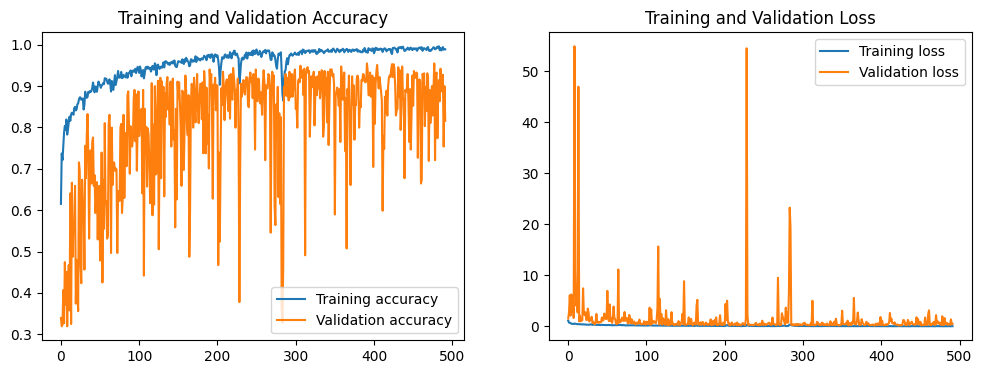

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load the ResNet50 model without pre-trained weights
base_model = ResNet50(weights=None, include_top=False, input_shape=(192, 192, 3))

# Set all layers to be trainable
for layer in base_model.layers:
    layer.trainable = True

# Add custom layers on top of ResNet
x = GlobalAveragePooling2D()(base_model.output)
predictions = Dense(3, activation='softmax')(x)  # Assuming 3 classes

# Create the final model and rename to model_res_retrained_aug
model_res_retrained_aug = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model_res_retrained_aug.compile(optimizer=Adam(),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Model summary
model_res_retrained_aug.summary()

# Prepare data using ImageDataGenerator with augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # using 20% of the data for validation
)

# Create training and validation generators
train_generator = train_datagen.flow(X_train, y_train, subset='training', batch_size=32)
validation_generator = train_datagen.flow(X_train, y_train, subset='validation', batch_size=32)

# Setup early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=100, verbose=1, restore_best_weights=True)

# Train the model with early stopping
history_res_retrained_aug = model_res_retrained_aug.fit(train_generator,
                           validation_data=validation_generator,
                           epochs=1000,  # Set a higher potential max epochs
                           callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss_res_retrained_aug, test_accuracy_res_retrained_aug = model_res_retrained_aug.evaluate(X_test, y_test)
print(f"Retrained ResNet with Augmentation Test accuracy: {test_accuracy_res_retrained_aug*100:.2f}%, Test loss: {test_loss_res_retrained_aug}")

# Optionally, visualize the training process
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_res_retrained_aug.history['accuracy'], label='Training accuracy')
plt.plot(history_res_retrained_aug.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_res_retrained_aug.history['loss'], label='Training loss')
plt.plot(history_res_retrained_aug.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
with open('model_res_retrained_aug.pkl', 'wb') as file:
    pickle.dump(model_res_retrained_aug, file)
with open('history_res_retrained_aug.pkl', 'wb') as file:
    pickle.dump(history_res_retrained_aug, file)

# 7 Interpretability & Insights

**Enhanced Training of ResNet50 with Data Augmentation (`model_res_retrained_aug`) performed the best!**  
This is an intuitive result because in this model we retrained all the params of resnet50 with an additional layer mapping to the final result. The retrained CNN layers could capture the specific patterns that is helpful for our medical task. Also, since we used augmentation as described in section 6, we make the model more robust and stronger in identifier patterns that could categorize different diseases and normal conditions. The detail of this model is clearly labeled in section 6. The OOS accuracy is 95%, which is better than all the models without augmentation, including baseline CNN, CNN pro, resnet50, resnet50 retrained, and VGG16.  
The performance curve is also clearly plotted in section 6.  
The practical use of my best performing model is that it could help doctor/patients to identify the disease. It could serve as a supplementary check in additional to doctor's dicretionary judgement. 95% OOS accuracy is helpful enough in practical settings. It could also be served as a pre-diagnostic that could give a very fast diagnostic without human intervention. This is particularly helpful when medical resources is contraining in certain pedanmic times.